In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np

In [20]:
df = pd.DataFrame([[2,4,np.nan,4],[1,np.nan,0,4],[np.nan,np.nan,5,2]])
df.columns = ['A', 'B', 'C', 'D']

In [5]:
# Mostrando algunas estadísticas
df.describe()

,A,B,C,D
count,2.000000,1.0,2.000000,3.000000
mean,1.500000,4.0,2.500000,3.333333
std,0.707107,NaN,3.535534,1.154701
min,1.000000,4.0,0.000000,2.000000
25%,1.250000,4.0,1.250000,3.000000
50%,1.500000,4.0,2.500000,4.000000
75%,1.750000,4.0,3.750000,4.000000
max,2.000000,4.0,5.000000,4.000000


In [9]:
# Mostrando el dataframe
df

,A,B,C,D
0,2.0,4.0,NaN,4
1,1.0,NaN,0.0,4
2,NaN,NaN,5.0,2


In [10]:
# Mostrando el dataframe como un numpy array
print(df.values)

[[  2.   4.  nan   4.]
 [  1.  nan   0.   4.]
 [ nan  nan   5.   2.]]


## Operaciones Básicas

In [11]:
df.isnull()

,A,B,C,D
0,False,False,True,False
1,False,True,False,False
2,True,True,False,False


In [16]:
# Contando los nulos por eje
df.isnull().sum(axis=1)

0    1
1    1
2    2
dtype: int64

In [17]:
#elimina las filas que tienen NaN
df.dropna()

,A,B,C,D


In [19]:
#elimina columnas que tienen NaN
df.dropna(axis=1)

,D
0,4
1,4
2,2


In [21]:
# Filas donde todas las columnas sean NaN
df.dropna(how='all')

,A,B,C,D
0,2.0,4.0,NaN,4
1,1.0,NaN,0.0,4
2,NaN,NaN,5.0,2


In [30]:
# No borra filas que tengan al menos 2 valores no NaN
df.dropna(thresh=2)

,A,B,C,D
0,2.0,4.0,NaN,4
1,1.0,NaN,0.0,4
2,NaN,NaN,5.0,2


In [31]:
# Filas donde NaN aparezca en una columna específica
df.dropna(subset=['C'])

,A,B,C,D
1,1.0,NaN,0.0,4
2,NaN,NaN,5.0,2


## Trabajando con Datos Incompletos

In [32]:
df

,A,B,C,D
0,2.0,4.0,NaN,4
1,1.0,NaN,0.0,4
2,NaN,NaN,5.0,2


In [36]:
# Imputer nos permitirá asignar valores por default en algunas celdas
from sklearn.preprocessing import Imputer
import numpy as np

imr = Imputer(missing_values='NaN', strategy='mean', axis=1) #Media por fila
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 2. ,  4. ,  2.5,  4. ],
       [ 1. ,  4. ,  0. ,  4. ],
       [ 1.5,  4. ,  5. ,  2. ]])

## Trabajando con datos categóricos

In [90]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],['red', 'L', 13.5, 'class2'],['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


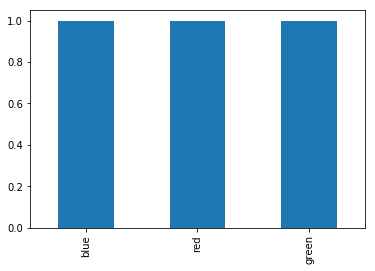

In [92]:
import matplotlib.pyplot as plt
df['color'].value_counts().plot(kind='bar')
plt.show()

### Atributos Ordinales

In [38]:
#Una técnica es colocando todo en un diccionario para luego hacer un mapping
size_mapping = {'XL': 3,'L': 2,'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [39]:
#si queremos invertir
inv_size_mapping = {v: k for k, v in size_mapping.items()}

df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [40]:
#Otra forma es usando el LabelEncoder
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['size'].values)
df['size'] = y
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,0,13.5,class2
2,blue,2,15.3,class1


In [41]:
#Para invertir
y = class_le.inverse_transform(y)
df['size'] = y
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Atributos Nominales

In [62]:
# Usando dummies
pd.get_dummies(df[['color']])

,color_blue,color_green,color_red
0,0,1,0
1,0,0,1
2,1,0,0


#### Ahora todo junto

In [87]:
#Una técnica es colocando todo en un diccionario para luego hacer un mapping
size_mapping = {'XL': 3,'L': 2,'M':1}
df['size'] = df['size'].map(size_mapping)

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
df['classlabel'] = y

df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [88]:
df = pd.get_dummies(df)
df

,size,price,classlabel,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


In [89]:
# Podemos remover una columna de color
df.drop('color_red', axis=1, inplace=True)
df

,size,price,classlabel,color_blue,color_green
0,1,10.1,0,0,1
1,2,13.5,1,0,0
2,3,15.3,0,1,0


## Trabajando con atributos con valores extremos

In [76]:
df = pd.DataFrame([[0.5, 10.1, 'class1'],[0.8, 13.5, 'class2'],[0.55, 15.3, 'class1']])
df.columns = ['grade', 'distance', 'classlabel']

X = df[['grade','distance']].values
X

array([[  0.5 ,  10.1 ],
       [  0.8 ,  13.5 ],
       [  0.55,  15.3 ]])

In [77]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_norm = mms.fit_transform(X)
X_norm

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.65384615],
       [ 0.16666667,  1.        ]])

In [78]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
X_std

array([[-0.88900089, -1.32954369],
       [ 1.3970014 ,  0.24735697],
       [-0.50800051,  1.08218672]])